Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

Loading data

In [3]:
df = pd.read_csv('students.csv')
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


Cleaning data

In [4]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [7]:
df.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


Converting string to numeric value

In [8]:
df['Do you have Anxiety?'] = df['Do you have Anxiety?'].map({'Yes': 1, 'No': 0}).astype(int)
df['Do you have Depression?'] = df['Do you have Depression?'].map({'Yes':1,'No':0}).astype(int)
df['Do you have Panic attack?'] = df['Do you have Panic attack?'].map({'Yes': 1, 'No': 0}).astype(int)

In [9]:
df['Your current year of Study'] = df['Your current year of Study'].astype(str).str.extract(r'(\d+)').astype(int)

Analysis

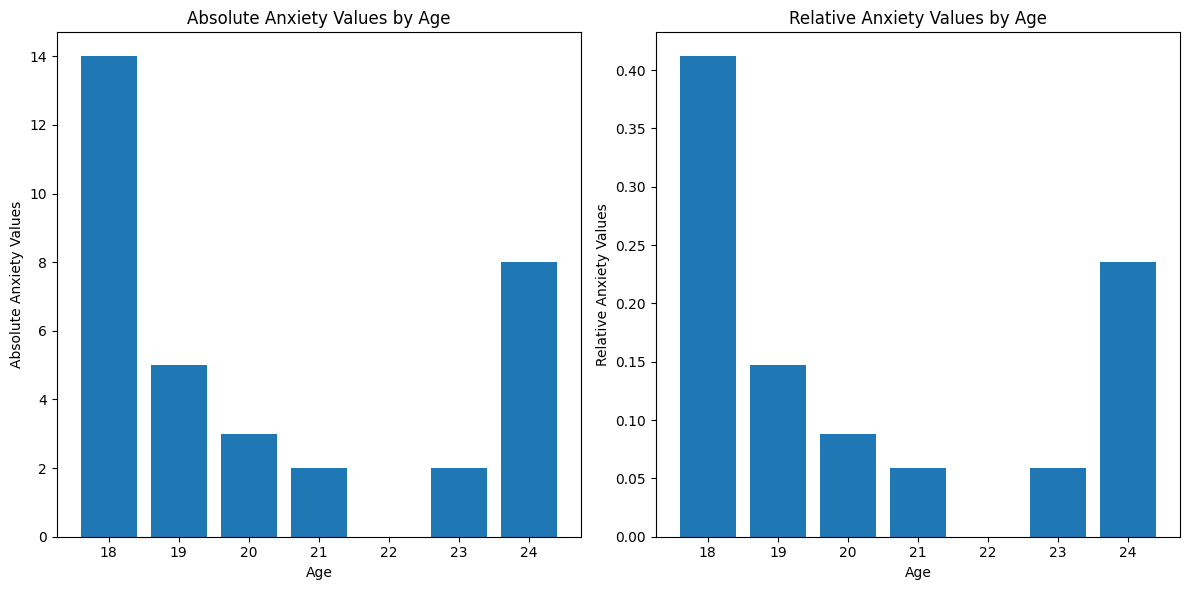

In [13]:
anxiety_by_age = df.groupby('Age')['Do you have Anxiety?'].sum()
total_anxiety= df['Do you have Anxiety?'].sum()
relative_anxiety_by_age = anxiety_by_age / total_anxiety if total_anxiety > 0 else pd.Series()

fig1, ax1 = plt.subplots(1, 2, figsize=(12, 6))
ax1[0].bar(anxiety_by_age.index, anxiety_by_age.values)
ax1[0].set_xlabel('Age')
ax1[0].set_ylabel('Absolute Anxiety Values')
ax1[0].set_title('Absolute Anxiety Values by Age')

ax1[1].bar(relative_anxiety_by_age.index, relative_anxiety_by_age.values)
ax1[1].set_xlabel('Age')
ax1[1].set_ylabel('Relative Anxiety Values')
ax1[1].set_title('Relative Anxiety Values by Age')

plt.tight_layout()
plt.show()

Depression Analysis

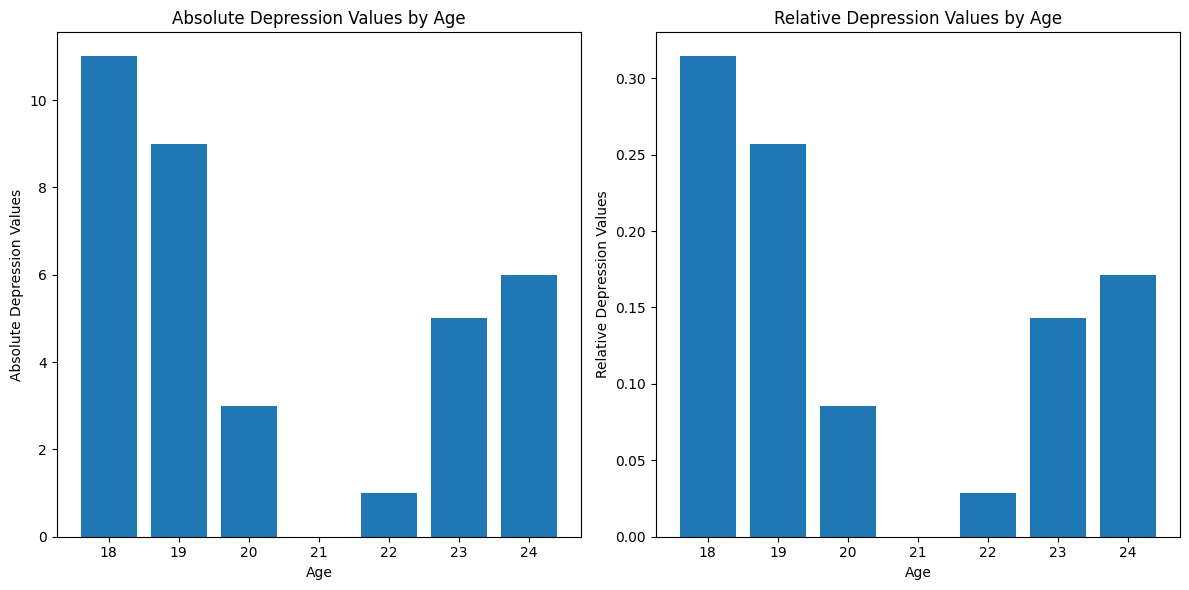

In [16]:
depression_by_age = df.groupby('Age')['Do you have Depression?'].sum()
total_depression = df['Do you have Depression?'].sum()
relative_depression_by_age = depression_by_age / total_depression if total_depression > 0 else pd.Series()

fig2, ax2 = plt.subplots(1, 2, figsize=(12, 6))
ax2[0].bar(depression_by_age.index, depression_by_age.values)
ax2[0].set_xlabel('Age')
ax2[0].set_ylabel('Absolute Depression Values')
ax2[0].set_title('Absolute Depression Values by Age')

ax2[1].bar(relative_depression_by_age.index, relative_depression_by_age.values)
ax2[1].set_xlabel('Age')
ax2[1].set_ylabel('Relative Depression Values')
ax2[1].set_title('Relative Depression Values by Age')

plt.tight_layout()
plt.show()

Panic Attack Analysis

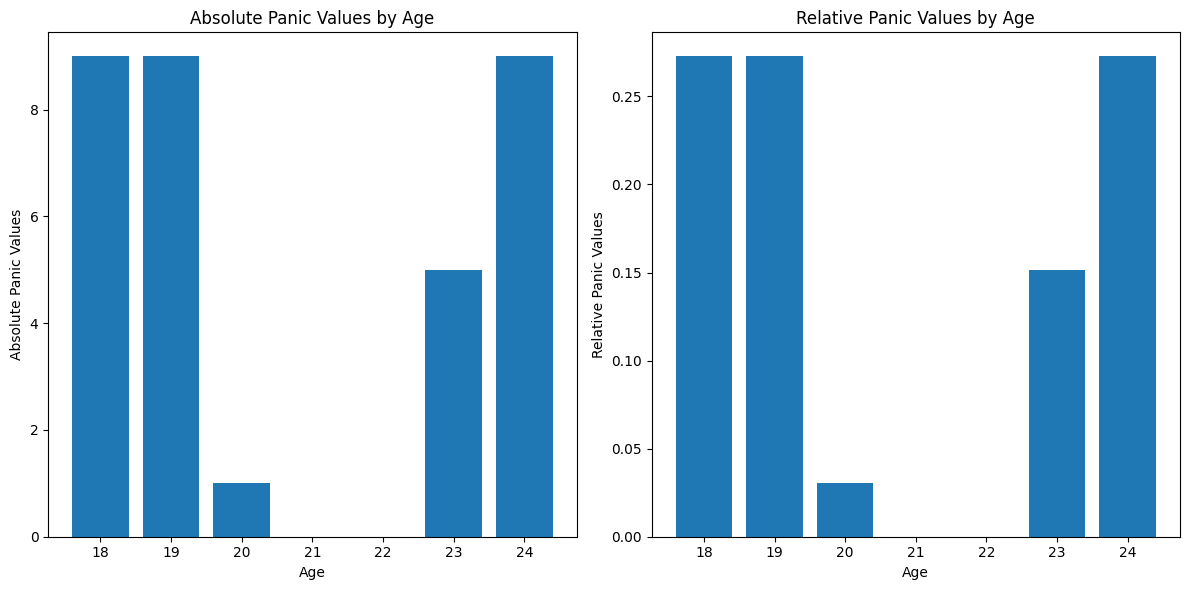

In [17]:
panic_by_age = df.groupby('Age')['Do you have Panic attack?'].sum()
total_panic = df['Do you have Panic attack?'].sum()
relative_panic_by_age = panic_by_age / total_panic if total_panic > 0 else pd.Series()

fig3, ax3 = plt.subplots(1, 2, figsize=(12, 6))
ax3[0].bar(panic_by_age.index, panic_by_age.values)
ax3[0].set_xlabel('Age')
ax3[0].set_ylabel('Absolute Panic Values')
ax3[0].set_title('Absolute Panic Values by Age')

ax3[1].bar(relative_panic_by_age.index, relative_panic_by_age.values)
ax3[1].set_xlabel('Age')
ax3[1].set_ylabel('Relative Panic Values')
ax3[1].set_title('Relative Panic Values by Age')

plt.tight_layout()
plt.show()


Age vs Year of Study Analysis

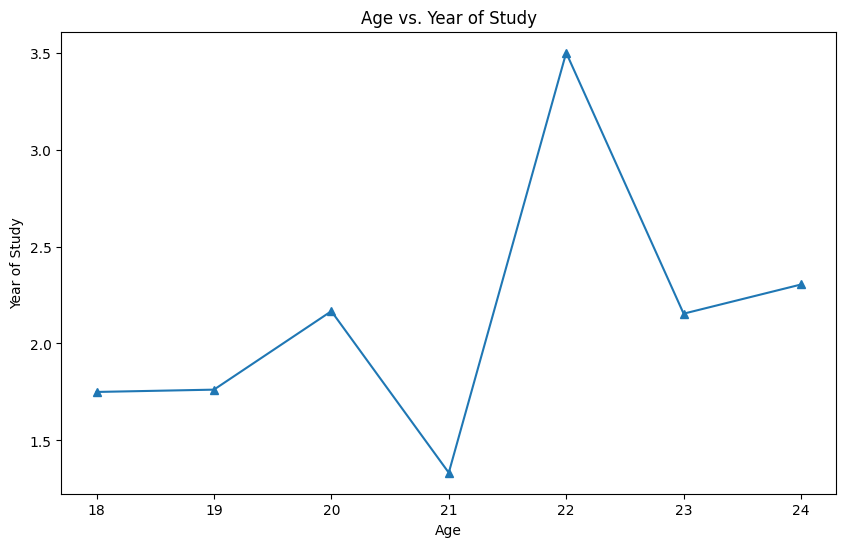

In [22]:
age_vs_year = df.groupby('Age')['Your current year of Study'].mean()

fig4 = plt.figure(figsize=(10, 6))
plt.plot(age_vs_year.index, age_vs_year.values, marker='^')
plt.xlabel('Age')
plt.ylabel('Year of Study')
plt.title('Age vs. Year of Study')
plt.show()

T-Test between students with and without Anxiety 

In [23]:
t_test_results = stats.ttest_ind(df[df['Do you have Anxiety?'] == 1]['Your current year of Study'],
                                 df[df['Do you have Anxiety?'] == 0]['Your current year of Study'])
print(f"T-Test Results: Statistic={t_test_results.statistic:.4f}, P-value={t_test_results.pvalue:.4f}")


T-Test Results: Statistic=-0.2788, P-value=0.7810


Statistical Results:
   
   Average grade for students with depression: 3.14
   Average grade for students without depression: 3.05
   The t-test results :
   t-value: 0.654
   p-value: 0.514 

Interpretation:
1. Students with depression have a slightly higher average grade (3.14) compared to those without depression (3.05).  
2. The t-test results (t = 0.654, p = 0.514) indicate no statistically significant difference between the two groups.  
3. The p-value (0.514) exceeds the 0.05 significance level, suggesting the difference is likely due to chance.  